Topic: Challenge Set 1 Subject: Explore MTA turnstile data Date: 04/13/2018 Name: student name Worked with: other students' name Location: sea18_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

In [260]:
import sys

In [261]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

import pprint

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

import dateutil.parser
from datetime import *

In [262]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 3)

In [263]:
#read data from this folder
df1 = pd.read_csv('turnstile_171007.csv')
df2 = pd.read_csv('turnstile_170902.csv')
df3 = pd.read_csv('turnstile_171021.csv')

In [264]:
#Work with turnstile name as combo
def Col_Con(mta):
    mta['TURNSTILE'] = mta['C/A'] + mta['UNIT'] + mta['SCP']
    mta.drop('C/A', axis=1, inplace = True)
    mta.drop('UNIT', axis=1,inplace = True)
    mta.drop('SCP', axis=1, inplace = True)
    mta = mta.drop('LINENAME', axis=1)
    mta = mta.drop('DIVISION', axis=1)
    mta = mta.drop('DESC', axis=1)
    mta.columns = mta.columns.str.strip()
    return mta

In [265]:
mta1 = Col_Con(df1)
mta2 = Col_Con(df2)
mta3 = Col_Con(df3)

In [266]:
leng = len(mta1.index)

In [267]:
# make new columns, blank
#Only use if we are using turnstiles as data 'mta['Cu_ENT'] = [0] * leng'
def new_cols(mta):
    leng = len(mta.index)
    mta['ENT_COUNT'] = [0] * leng
    mta['EXT_COUNT'] = [0] * leng
    mta['DATE_TIME'] = [''] * leng
    return mta

In [268]:
mta1 = new_cols(mta1)
mta2 = new_cols(mta2)
mta3 = new_cols(mta3)

In [269]:
# Fill empty date time column with formula
# I dont think we will use this...
def date_time(df):
    week   = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    for i in range(leng):
        datetime = df.DATE[i]+ ' ' + df.TIME[i]      
        value = dateutil.parser.parse(datetime)
        df.at[i,'DATE_TIME'] = value
    return df

In [270]:
mta1 = date_time(mta1)
mta2 = date_time(mta2)
mta3 = date_time(mta3)

In [271]:
#fill empty ent_count with formula
def coun_ent(mta):
    for i in range(leng):
        if i == 0: 
            mta.at[i,'ENT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.ENTRIES[i] - mta.ENTRIES[i-1]
                # ignore any negative entry count or very large entry counts, turnstile malfunction
                # we should discuss a better 
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'ENT_COUNT'] = diff
            else:
                mta.at[i,'ENT_COUNT'] = 0
    return mta

In [272]:
mta1 = coun_ent(mta1)
mta2 = coun_ent(mta2)
mta3 = coun_ent(mta3)

In [273]:
#fill in new exit counts
def coun_ext(mta):
    for i in range(leng):
        if i == 0: 
            mta.at[i,'EXT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.EXITS[i] - mta.EXITS[i-1]
                # ignore any negative entry count or very large entry counts, turnstile malfunction
                # we should discuss a better 
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'EXT_COUNT'] = diff
            else:
                mta.at[i,'EXT_COUNT'] = 0
                
    return mta

In [274]:
mta1 = coun_ext(mta1)
mta2 = coun_ext(mta2)
mta3 = coun_ext(mta3)

In [275]:
def mor_cln(mta):   
    mta = mta.drop('TIME', axis=1)
    mta = mta.drop('ENTRIES', axis=1)
    mta = mta.drop('EXITS', axis=1)
    return mta

In [276]:
mta1 = mor_cln(mta1)
mta2 = mor_cln(mta2)
mta3 = mor_cln(mta3)

In [277]:
# Check all negative and large numbers have been removed

mta1.describe()
mta2.describe()
mta3.describe()

ENT_COUNT   EXT_COUNT
count  197912.000  197912.000
mean      183.690     139.994
std       274.758     237.477
min         0.000       0.000
25%         7.000       6.000
50%        73.000      51.000
75%       252.000     171.000
max      8934.000    4367.000

In [278]:
#tur_uni = mta.TURNSTILE.unique()

In [279]:
"""# Find some time of day trend?
turn = ''
date = ''
sum_ent = 0
cu_list = []
for i in range(leng):
    #Initialing complex if, goal is to have the cumulative for each day 
    if turn != mta.TURNSTILE[i] and i==0:
        turn = mta.TURNSTILE[i]
        date = mta.DATE[i]
        beg_in = i
        sum_ent= 0
    #if the turnstile and date are the same, sum up the ent_count
    elif (turn == mta.TURNSTILE[i] and date == mta.DATE[i]):
        sum_ent += mta['ENT_COUNT'][i]
    #if either the turnstile number changes, or the date changes, dump the sum of entries, 
    #and store in a new column across multpile indexes
    elif turn != mta.TURNSTILE[i] or date != df.DATE[i]:
        for j in range(i-beg_in):
            j +=beg_in
            mta.at[j, 'Cu_ENT'] = sum_ent 
        turn = mta.TURNSTILE[i]
        date = mta.DATE[i]
        beg_in = i
        sum_ent = mta['ENT_COUNT'][i]
mta"""

"# Find some time of day trend?\nturn = ''\ndate = ''\nsum_ent = 0\ncu_list = []\nfor i in range(leng):\n    #Initialing complex if, goal is to have the cumulative for each day \n    if turn != mta.TURNSTILE[i] and i==0:\n        turn = mta.TURNSTILE[i]\n        date = mta.DATE[i]\n        beg_in = i\n        sum_ent= 0\n    #if the turnstile and date are the same, sum up the ent_count\n    elif (turn == mta.TURNSTILE[i] and date == mta.DATE[i]):\n        sum_ent += mta['ENT_COUNT'][i]\n    #if either the turnstile number changes, or the date changes, dump the sum of entries, \n    #and store in a new column across multpile indexes\n    elif turn != mta.TURNSTILE[i] or date != df.DATE[i]:\n        for j in range(i-beg_in):\n            j +=beg_in\n            mta.at[j, 'Cu_ENT'] = sum_ent \n        turn = mta.TURNSTILE[i]\n        date = mta.DATE[i]\n        beg_in = i\n        sum_ent = mta['ENT_COUNT'][i]\nmta"

In [280]:
def merge_agg(ent_agg, ext_agg):
    ent_agg.columns = ent_agg.columns.droplevel(level=1)
    ext_agg.columns = ext_agg.columns.droplevel(level=1)
    #Creating a new data frame removing repeted values
    q_mta = pd.merge(ent_agg, ext_agg, on=['STATION','DATE_TIME'], how='left')
    return q_mta

In [281]:
def get_agg(mta):
    mt = mta.groupby(['STATION','DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['sum']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['sum']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [282]:
def get_agg_mean(mta):
    mt = mta.groupby(['STATION','DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['mean']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['mean']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [283]:
mta1 = get_agg(mta1)
mta2 = get_agg(mta2)
mta3 = get_agg(mta3)

In [284]:
def super_merge(a,b,c):
    new_df = pd.concat([a, b])
    q_mta = pd.concat([new_df, c])
    q_mta=get_agg_mean(q_mta)
    return q_mta
#, on=['STATION','DATE_TIME'], how='left'
#, on=['STATION','DATE_TIME'], how='left')

In [285]:
super_df = super_merge(mta1,mta2,mta3)
super_df

STATION  DATE_TIME   ENT_COUNT  EXT_COUNT
0                1 AV     Friday   22500.667  23306.333
1                1 AV     Monday   19619.333  21013.000
2                1 AV   Saturday   12775.333  14304.333
3                1 AV     Sunday   14727.000  16703.333
4                1 AV   Thursday   21878.333  22537.000
5                1 AV    Tuesday   20745.333  22036.667
6                1 AV  Wednesday   21399.000  22210.333
7              103 ST     Friday   31531.667  21262.333
8              103 ST     Monday   30595.667  20186.000
9              103 ST   Saturday   17596.333  11275.333
10             103 ST     Sunday   16261.000  12028.667
11             103 ST   Thursday   32384.667  21650.000
12             103 ST    Tuesday   31955.000  21574.000
13             103 ST  Wednesday   32407.000  21819.000
14      103 ST-CORONA     Friday   20562.667  16877.333
15      103 ST-CORONA     Monday   19863.333  15289.333
16      103 ST-CORONA   Saturday   13511.333  10158.333
17      103 ST-CORONA     Sunday   11930.000  11418.333
18      103 ST-CORONA   Thursday   20442.667  16367.000
19      103 ST-CORONA    Tuesday   20466.667  16341.000
20      103 ST-CORONA  Wednesday   20570.667  17073.667
21             104 ST     Friday    2974.000    836.667
22             104 ST     Monday    3069.333    769.000
23             104 ST   Saturday    1386.333    385.000
24             104 ST     Sunday    1125.000    407.667
25             104 ST   Thursday    3165.333    877.000
26             104 ST    Tuesday    3126.667    904.667
27             104 ST  Wednesday    3133.333    863.667
28             110 ST     Friday   11986.000   9387.667
29             110 ST     Monday   11295.667   8551.000
30             110 ST   Saturday    5872.000   4663.667
31             110 ST     Sunday    5336.333   4905.667
32             110 ST   Thursday   12013.333   9345.667
33             110 ST    Tuesday   11846.667   9243.333
34             110 ST  Wednesday   11929.667   9294.333
35             111 ST     Friday   17733.667  10335.667
36             111 ST     Monday   17658.333   9713.333
37             111 ST   Saturday   10853.333   6148.333
38             111 ST     Sunday    9772.667   6757.667
39             111 ST   Thursday   17931.000  10593.000
40             111 ST    Tuesday   18013.000  10666.000
41             111 ST  Wednesday   17921.000  10501.000
42             116 ST     Friday   35096.333  17495.000
43             116 ST     Monday   33583.667  16394.000
44             116 ST   Saturday   19427.000   8827.667
45             116 ST     Sunday   18622.333   9938.000
46             116 ST   Thursday   35157.000  17440.000
47             116 ST    Tuesday   34727.333  17210.000
48             116 ST  Wednesday   35272.667  17508.667
49    116 ST-COLUMBIA     Friday   16493.333   7624.333
50    116 ST-COLUMBIA     Monday   15197.667   8401.000
51    116 ST-COLUMBIA   Saturday    7754.667   3815.000
52    116 ST-COLUMBIA     Sunday    7150.333   3834.000
53    116 ST-COLUMBIA   Thursday   16891.000   8376.333
54    116 ST-COLUMBIA    Tuesday   16452.333   8308.667
55    116 ST-COLUMBIA  Wednesday   16544.667   8566.667
56             121 ST     Friday    1040.667    644.667
57             121 ST     Monday    1041.000    635.000
58             121 ST   Saturday     513.333    460.000
59             121 ST     Sunday     433.333    418.667
60             121 ST   Thursday    1043.000    649.667
61             121 ST    Tuesday    1062.667    647.667
62             121 ST  Wednesday    1055.333    640.000
63             125 ST     Friday   79486.333  65900.667
64             125 ST     Monday   72965.000  58486.333
65             125 ST   Saturday   43002.333  40285.667
66             125 ST     Sunday   45004.667  42695.000
67             125 ST   Thursday   75109.667  59652.333
68             125 ST    Tuesday   75522.333  59999.667
69             125 ST  Wednesday   76412.333  61668.667
70             135 ST     Friday   212

In [300]:
super_df.sort_values(by=['ENT_COUNT'], ascending = 0, inplace = True)
uni_stations = list(super_df.STATION.unique())[:30]
leng = len(super_df.index)
est_donors = []
for i in range(leng):
    est_donors.append(super_df['ENT_COUNT'][i]*.0005)
super_df['Donor Est.'] = est_donors

In [287]:
uni_df = super_df[super_df['STATION'].isin(uni_stations)]
uni_dt = super_df.DATE_TIME.unique()
print(uni_df)
uni_dt.sort()
uni_dt

              STATION  DATE_TIME   ENT_COUNT   EXT_COUNT
432    34 ST-PENN STA    Tuesday  165976.000  140119.333
433    34 ST-PENN STA  Wednesday  165522.333  138591.000
431    34 ST-PENN STA   Thursday  164640.333  144113.000
428    34 ST-PENN STA     Monday  159817.333  131325.333
427    34 ST-PENN STA     Friday  158644.000  143575.000
1639  GRD CNTRL-42 ST    Tuesday  157206.000  146038.333
1640  GRD CNTRL-42 ST  Wednesday  152636.667  144512.667
1638  GRD CNTRL-42 ST   Thursday  150894.000  143479.667
1635  GRD CNTRL-42 ST     Monday  144064.333  136375.333
1634  GRD CNTRL-42 ST     Friday  138646.333  133234.667
328             23 ST  Wednesday  124434.667   90544.333
327             23 ST    Tuesday  123395.667   90292.667
326             23 ST   Thursday  122235.000   91130.333
419   34 ST-HERALD SQ  Wednesday  117260.667  112128.333
322             23 ST     Friday  115427.333   81952.333
417   34 ST-HERALD SQ   Thursday  112235.667  111629.667
104    14 ST-UNION SQ  Wednesda

array(['', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'], dtype=object)

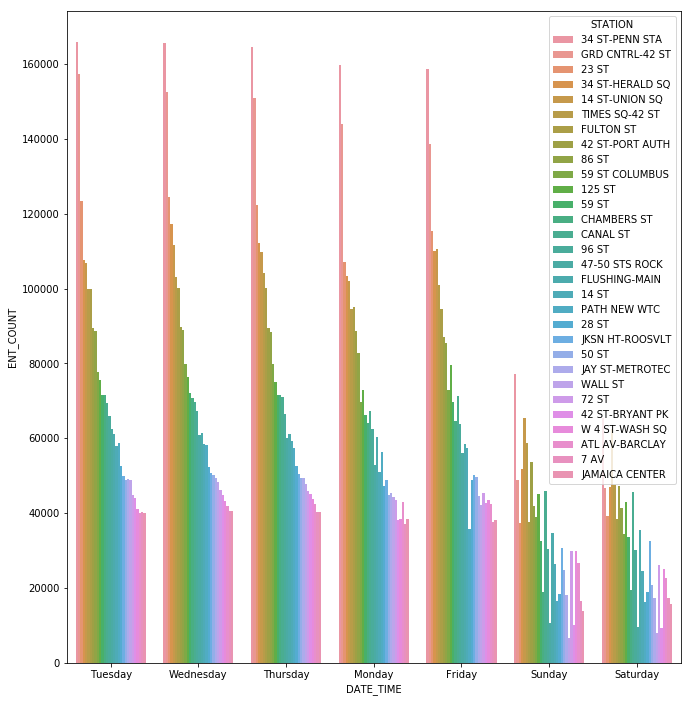

In [288]:
# Next step! Combine days together and analyze what locations are the most popular and one what days
import seaborn as sns
import matplotlib.dates as mdates

# build the figure
fig, ax = plt.subplots(figsize=(11,12))
sns.barplot('DATE_TIME', 'ENT_COUNT', data=uni_df, hue='STATION', ax=ax)



ValueError: Could not interpret input 'DATE'

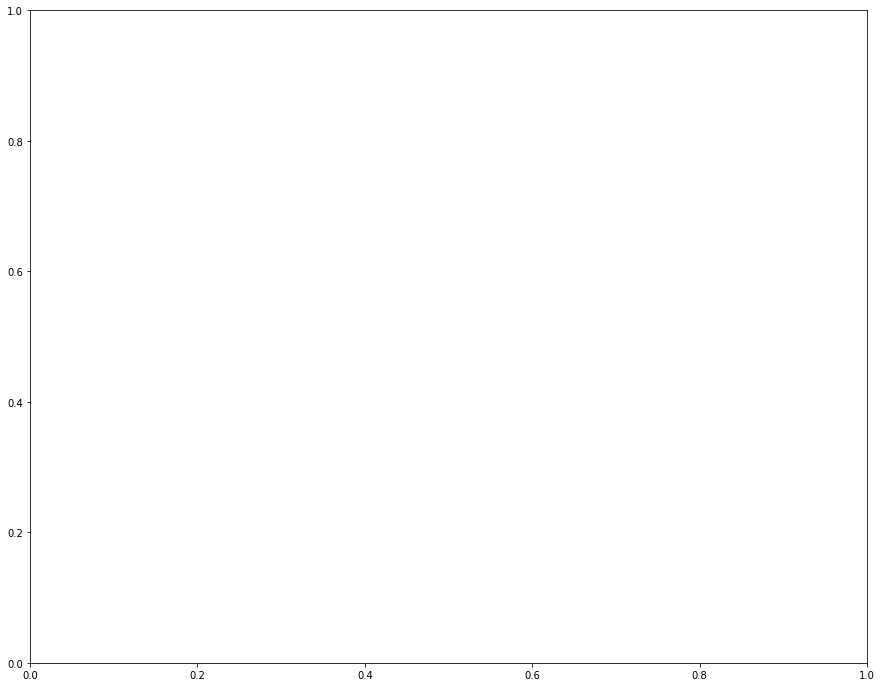

In [289]:
fig, ax = plt.subplots(figsize=(15,12))
sns.pointplot(y="ENT_COUNT", x="DATE_TIME", data=uni_df, join=True, hue='STATION', ax=ax, linestyles='-', order= uni_dt)

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}



#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.


#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

#### Challenge 7

Plot the time series for a station.

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)